# Data Preprocessing

## Introduction

In the real world, data is not clean. Several techniques are used as follows:

- Data cleaning: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies.
- Data integration: using multiple databases, data cubes, or files.
- Data transformation: normalization and aggregation.
- Data reduction: reducing the volume but producing the same or similar analytical results.
- Data discretization: part of data reduction, replacing numerical attributes with nominal ones.

## Case study 

The dataset I chose is from **Kaggle**. It is called Melbourne Housing Market. The following link is: https://www.kaggle.com/anthonypino/melbourne-housing-market

### 1. Import useful packages, read datasets and get some general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny
import seaborn as sns

In [2]:
housing = pd.read_csv('housing.csv')

In [12]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


The dataset had 21 attributes and 34857 observations in all.

In [17]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [18]:
housing.isnull().sum()/len(housing)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

It shows missing value percentage for each column. We can also get the percentage of all the missing values.

In [18]:
missing = housing.isnull().sum().sum()
all = housing.isnull().count().sum()
missing/all*100

13.794455441757275

There are a lot of missing values in the dataset, especially in Landsize, BuildingArea, and YearBuilt column. **13%** of the data are missing. That is not bad.

**You can also visualize missing values**

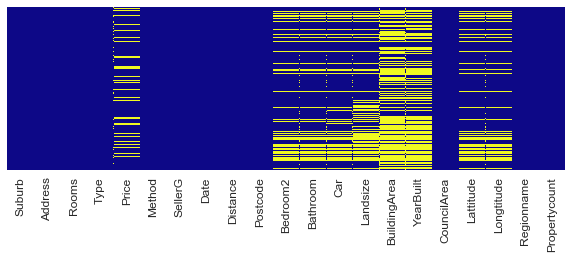

In [16]:
plt.figure(figsize=(10,3))
sns.set(font_scale=1.2)
sns.heatmap(housing.isnull(),yticklabels = False, cbar = False, cmap = 'plasma')

### 2. Obtain descriptive statistics of some attributes.

Firstly, we need to understand the data type. Typically, they are:

1. Categorical data
  - Nominal: variables are variables that have two or more categories, but which do not have an intrinsic order.
  Examples: Gender, weather, room type
  - Ordinal: variables are variables that have two or more categories just like nominal variables only the categories can also be ordered or ranked.
  Examples: Class, Ranking
  
2. Numeric data
  - Interval
  - Ratio


Measures of the central tendency: Mean, Median, Mode

  - **Mean**: Average; Susceptible to outliers.
  - **Median**: Better in skewed data
  - **Mode**: the most frequent score. Best for nominal data
  - **Importance**: right-skewed data: median > mean. left-skewed data: median < mean 
  
  The more skewed the distribution, the greater the difference between the median and mean, and the greater emphasis should be placed on using the median as opposed to the mean.
  
  
  
Measures of the Dispersion: Variance/Standard Deviation, Range, interquantile range

  - **Variance/Standatd Deviation**
  - **Range**: Max-min, 
  - **Interquartile**: Q3 - Q1. Interquartile range is where the middle 50% data locates.

In [11]:
housing.describe()
#'mean of housing price',housing['Price'].mean()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Here, we choose price and number of rooms as two attributes we are interested in.

Also, we may need **median, mode, range, quartiles** for these two attributes.

In [40]:
'median of housing price',housing['Price'].median()

median of housing price 870000.0


('quartiles for housing price', 870000.0)

In [24]:
'mode of housing price',housing['Price'].mode()[0],housing['Price'].mode()[1]

('mode of housing price', 600000.0, 1100000.0)

In [26]:
'mode of housing price',[x for x in housing['Price'].mode()]

('mode of housing price', [600000.0, 1100000.0])

In [30]:
'range of housing price',housing['Price'].max()-housing['Price'].min()

('range of housing price', 11115000.0)

In [10]:
'quartiles for housing price',housing['Price'].quantile([0.25,0.75])

('quartiles for housing price', 0.25     635000.0
 0.75    1295000.0
 Name: Price, dtype: float64)

In [64]:
'standard deviation for housing price',housing['Price'].std()

('standard deviation for housing price', 641467.1301046001)

Visualize the distributions of numeric value

Histogram, Boxplot

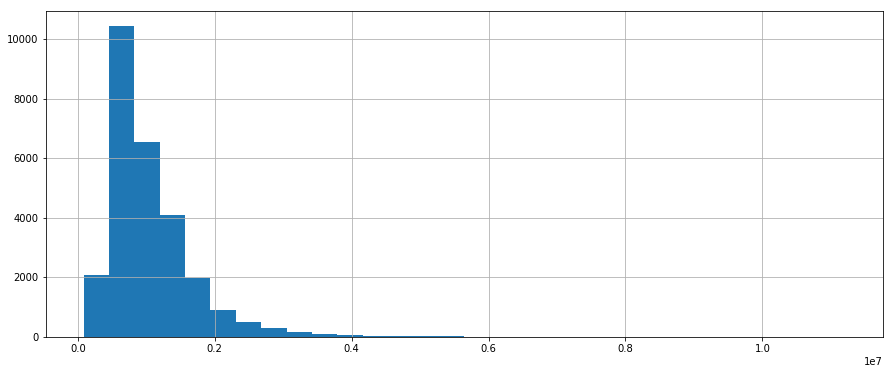

In [67]:
plt.figure(figsize=[15,6])
housing['Price'].hist(bins=30)

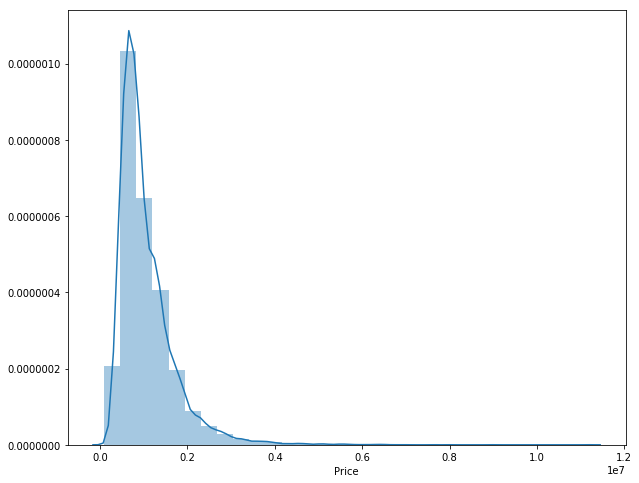

In [8]:
plt.figure(figsize=[10,8])
sns.distplot(housing['Price'].dropna(),bins=30)

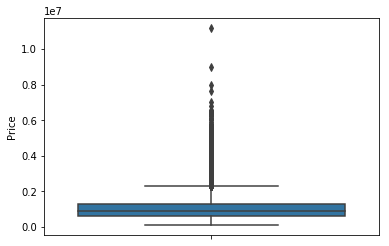

In [66]:
sns.boxplot(y='Price',data=housing)

Then apply the same techniques to **Rooms** column. 

In [52]:
'median of room number',housing['Rooms'].median()

('median of room number', 3.0)

In [54]:
'mode of room number',housing['Rooms'].mode()[0]

('mode of room number', 3)

In [55]:
'range of room number',housing['Rooms'].max()-housing['Rooms'].min()

('range of room number', 15)

In [9]:
'quartiles for room number',housing['Rooms'].quantile([0.25,0.75])

('quartiles for room number', 0.25    2.0
 0.75    4.0
 Name: Rooms, dtype: float64)

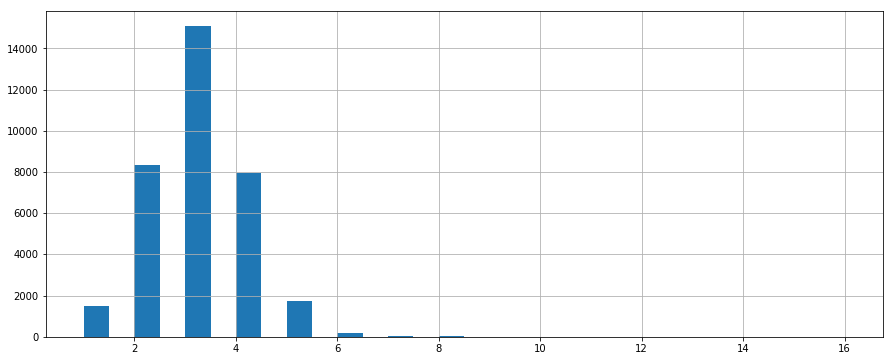

In [58]:
plt.figure(figsize=[15,6])
housing['Rooms'].hist(bins=30)

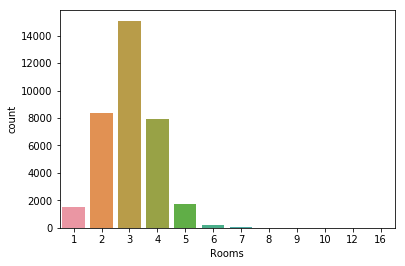

In [59]:
sns.countplot(housing['Rooms'])

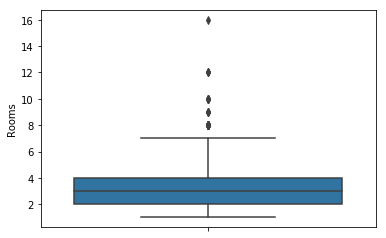

In [61]:
sns.boxplot(y=housing['Rooms'])

### 3. Potential problem of data quality

**1. Missing data**

   There are several methods to handle missing values. In summary, they are:
   
   - Ignore the tuple: usually done when class label is missing.
   - Use the attribute mean (or majority nominal value) to fill in the missing value.
   - Use the attribute mean (or majority nominal value) for all samples belonging to the same class.
   - Predict the missing value by using a learning algorithm: consider the attribute with the missing value as a dependent (class) variable and run a learning algorithm (usually Bayes or decision tree) to predict the missing value.
   
   Reference: http://www.cs.ccsu.edu/~markov/ccsu_courses/datamining-3.html
   

**To simply, we just remove all the observations which have missing values. Advanced methods will be studied in the future.**

In [7]:
housing = housing.dropna()

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

** Alternatively, you can take a closer look at dataset **

First, let's drop rows whose price is missing because price is kind of what we are interested in, that is target values.


In [4]:
housing = housing[housing['Price'].notnull()]

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


In [6]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

Now, we drop all the missing values. Dataset is clean. 


**2. Outlier data**
   
   There are several methods to handle missing values. In summary, they are:
   
   - Binning
       - Sort the attribute values and partition them into bins (see "Unsupervised discretization" below);
       - Then smooth by bin means,  bin median, or  bin boundaries.
   - Clustering: group values in clusters and then detect and remove outliers (automatic or manual) 
   - Regression: smooth by fitting the data into regression functions.
   - Univariate method: Boxplot

In [22]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [26]:
housing[housing['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051.0,...,1.0,1.0,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/09/2017,9.7,3104.0,...,3.0,2.0,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/09/2017,12.1,3083.0,...,1.0,2.0,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,3/09/2017,20.6,3064.0,...,2.0,2.0,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,3/09/2017,7.0,3071.0,...,2.0,2.0,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0
22040,Prahran,6 Aberdeen Rd,3,h,1390000.0,S,Marshall,19/08/2017,4.6,3181.0,...,2.0,1.0,125.0,0.0,2002.0,Stonnington City Council,-37.85257,145.00296,Southern Metropolitan,7717.0
22507,Huntingdale,33 Beauford St,3,h,1205000.0,SA,FN,23/09/2017,12.3,3166.0,...,2.0,4.0,622.0,0.0,1960.0,Monash City Council,-37.90823,145.10851,Southern Metropolitan,768.0
22931,Balwyn North,1 Hosken St,5,h,2800000.0,S,Marshall,26/08/2017,9.7,3104.0,...,2.0,2.0,1173.0,0.0,1960.0,Boroondara City Council,-37.80385,145.09094,Southern Metropolitan,7809.0
22994,Brighton East,60 Cummins Rd,3,h,1650000.0,SP,Buxton,26/08/2017,10.3,3187.0,...,2.0,2.0,623.0,0.0,1920.0,Bayside City Council,-37.92698,145.02673,Southern Metropolitan,6938.0
23022,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,26/08/2017,12.1,3083.0,...,2.0,1.0,525.0,0.0,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0


In [27]:
housing[housing['Rooms']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


BuildingArea is suspicious because of zero values. How could they be zero since they all have rooms? Some mistakes might be taken in the data entry. We choose to remove these observations.

In [9]:
housing = housing[housing['BuildingArea']!=0]

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8842 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8842 non-null object
Address          8842 non-null object
Rooms            8842 non-null int64
Type             8842 non-null object
Price            8842 non-null float64
Method           8842 non-null object
SellerG          8842 non-null object
Date             8842 non-null object
Distance         8842 non-null float64
Postcode         8842 non-null float64
Bedroom2         8842 non-null float64
Bathroom         8842 non-null float64
Car              8842 non-null float64
Landsize         8842 non-null float64
BuildingArea     8842 non-null float64
YearBuilt        8842 non-null float64
CouncilArea      8842 non-null object
Lattitude        8842 non-null float64
Longtitude       8842 non-null float64
Regionname       8842 non-null object
Propertycount    8842 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


**3. Data Reduction**
   
   Data reduction is necessary when there are too much redundant information in the dataset. In summary, common methods are:
   
   - Reducing the number of attributes
       - Data cube aggregation: applying roll-up, slice or dice operations.
       - Removing irrelevant attributes: attribute selection (filtering and wrapper methods), searching the attribute space (see Lecture 5: Attribute-oriented analysis).
       - Principle component analysis (numeric attributes only): searching for a lower dimensional space that can best represent the data
   - Reducing the number of attribute values
       - Binning (histograms): reducing the number of attributes by grouping them into intervals (bins).
       - Clustering: grouping values in clusters.
       - Aggregation or generalization
   - Reducing the number of tuples
       - Sampling
       
   Reference: http://www.cs.ccsu.edu/~markov/ccsu_courses/datamining-3.html
   

In this case, Address and sellerG (real estate agent) seems to be unnecessary currently. In the future, natural language processing might help include in the model. Also, bedroom2 is scraped from different sources. We chose to ignore this column.  

In [11]:
housing = housing.drop(['Address','SellerG'],axis = 1)    #axis=1 indicate the column name

### 4. Feature Engineering

Feature engineering is important to dig more inforamtion from row data. We just translate some attributes into new ones that make more sense in the reality. For example, in the case, we would translate YearBuilt into **Age of property**. Date sold can also be split into three attributes: **Year, Month and Weekday**. 

Let's do it!

In [12]:
housing['Age'] = 2018-housing['YearBuilt']

In [13]:
housing[housing['Age']<0]

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
33033,Bentleigh,3,h,1100000.0,VB,17/03/2018,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795.0,-1.0


** Notice Here: There is one property to be built in 2019 **

We are using groupby function to see the average price VS age of property

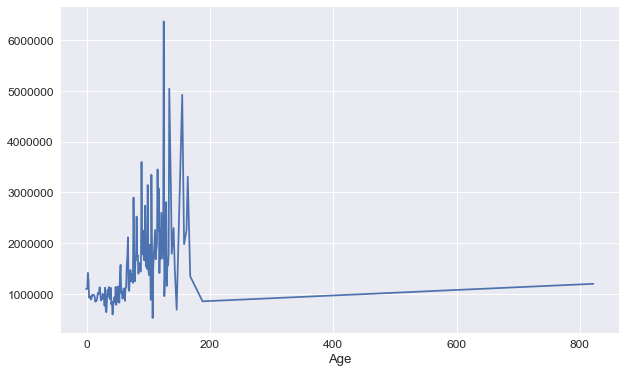

In [76]:
plt.figure(figsize=(10,6))
housing.groupby('Age')['Price'].mean().plot()

Here, we found a age of 800. It could be true, but it seems an outlier. We choose to take it out.

In [77]:
housing[housing['Age']>400]

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Year,Month,Weekday
16424,Mount Waverley,3,h,1200000.0,VB,2017-06-24,14.2,3149.0,3.0,1.0,...,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,822.0,2017,6,5


In [14]:
housing = housing[housing['Age']<500]

Then we visualize again. It should be good now.

Text(0,0.5,'Price')

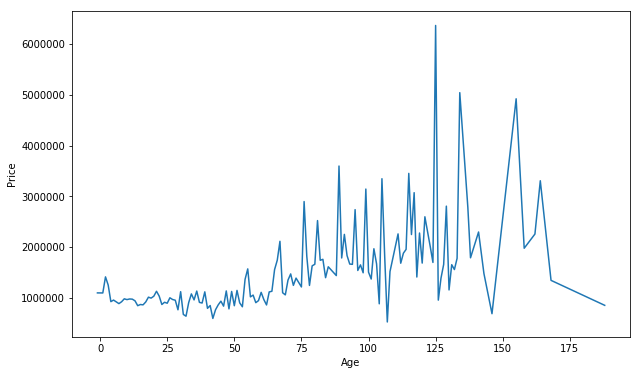

In [15]:
plt.figure(figsize=(10,6))
ax=housing.groupby('Age')['Price'].mean().plot()
ax.set_ylabel('Price')

**Interesting Finding!**

Then we transform Date column!

In [16]:
housing['Date']=pd.to_datetime(housing['Date'],infer_datetime_format=True)  ## transform Date column to datetime object

In [17]:
housing['Year']=pd.DatetimeIndex(housing['Date']).year
housing['Month']=pd.DatetimeIndex(housing['Date']).month
housing['Weekday']=pd.DatetimeIndex(housing['Date']).weekday

In [18]:
housing.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Year,Month,Weekday
2,Abbotsford,2,h,1035000.0,S,2016-04-02,2.5,3067.0,2.0,1.0,...,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0,2016,4,5
4,Abbotsford,3,h,1465000.0,SP,2017-04-03,2.5,3067.0,3.0,2.0,...,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0,2017,4,0
6,Abbotsford,4,h,1600000.0,VB,2016-04-06,2.5,3067.0,3.0,1.0,...,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4.0,2016,4,2
11,Abbotsford,3,h,1876000.0,S,2016-07-05,2.5,3067.0,4.0,2.0,...,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,108.0,2016,7,1
14,Abbotsford,2,h,1636000.0,S,2016-08-10,2.5,3067.0,2.0,1.0,...,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,128.0,2016,8,2


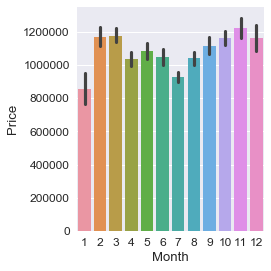

In [62]:
sns.factorplot(y='Price',x='Month',kind='bar',data=housing)

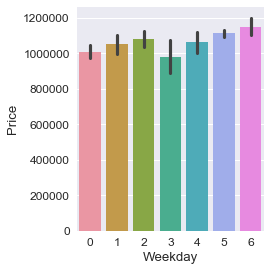

In [63]:
sns.factorplot(y='Price',x='Weekday',kind='bar',data=housing) 


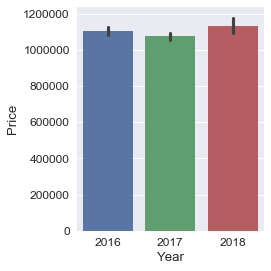

In [82]:
sns.factorplot(y='Price',x='Year',kind='bar',data=housing)

** Here you may notice that boxplot may help more. Let's visualize again! **

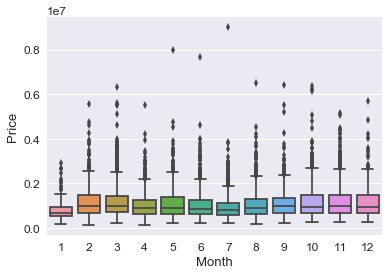

In [83]:
sns.boxplot(y='Price',x='Month',data=housing)

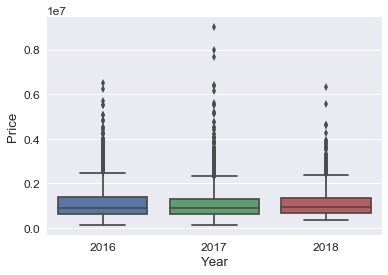

In [85]:
sns.boxplot(y='Price',x='Year',data=housing)

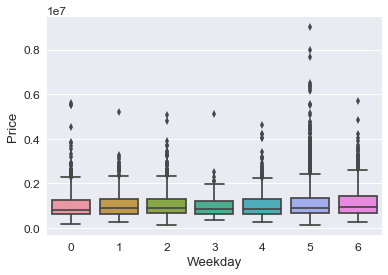

In [86]:
sns.boxplot(y='Price',x='Weekday',data=housing)

## Conclusion

1. Data preprocessing is very important.
2. More advanced method in outliers detection and missing values handling is to be studied in the future
   - I am really not sure what outliers should be taken into account. Price has many extreme values from boxplot. Should we take all of them off?
   - Missing values had better be taken care of carefully. Here, I just drop them.
3. Visualization will be introduced next time.

Thank you!

In [19]:
housing.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Year,Month,Weekday
2,Abbotsford,2,h,1035000.0,S,2016-04-02,2.5,3067.0,2.0,1.0,...,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,118.0,2016,4,5
4,Abbotsford,3,h,1465000.0,SP,2017-04-03,2.5,3067.0,3.0,2.0,...,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,118.0,2017,4,0
6,Abbotsford,4,h,1600000.0,VB,2016-04-06,2.5,3067.0,3.0,1.0,...,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,4.0,2016,4,2
11,Abbotsford,3,h,1876000.0,S,2016-07-05,2.5,3067.0,4.0,2.0,...,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,108.0,2016,7,1
14,Abbotsford,2,h,1636000.0,S,2016-08-10,2.5,3067.0,2.0,1.0,...,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,128.0,2016,8,2


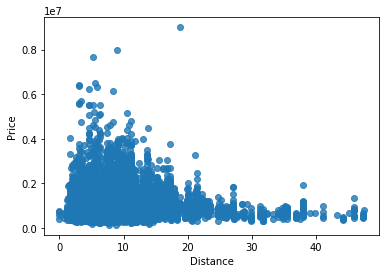

In [21]:
sns.regplot(x='Distance',y='Price',data=housing,fit_reg=False)